<a href="https://colab.research.google.com/github/SanjayBista1010/my-first-repo/blob/main/taskEDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [22]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [23]:
df['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,23443
MORTGAGE,18489
OWN,2951
OTHER,117


In [24]:
df['person_gender'] = df['person_gender'].map({'male': 1, 'female': 0})

yorn= {
    'Yes':1,
    'No':0
}


home_ownership_map = {
    'RENT': 0,
    'OTHER': 1,
    'MORTGAGE': 2,
    'OWN': 3
}

loan_intent_map = {
    'EDUCATION': 0,
    'MEDICAL': 1,
    'PERSONAL': 2,
    'HOMEIMPROVEMENT': 3,
    'VENTURE': 4,
    'DEBTCONSOLIDATION': 5
}

edu_lvl = {
    'High School': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate': 4
}

df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace(yorn).astype(int)
df['person_home_ownership'] = df['person_home_ownership'].replace(home_ownership_map).astype(int)
df['loan_intent'] = df['loan_intent'].replace(loan_intent_map).astype(int)
df['person_education'] = df['person_education'].replace(edu_lvl).astype(int)
encoded_df = df
encoded_df

/tmp/ipython-input-24-2444024724.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace(yorn).astype(int)
/tmp/ipython-input-24-2444024724.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['person_home_ownership'] = df['person_home_ownership'].replace(home_ownership_map).astype(int)
/tmp/ipython-input-24-2444024724.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old be

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,3,71948.0,0,0,35000.0,2,16.02,0.49,3.0,561,0,1
1,21.0,0,0,12282.0,0,3,1000.0,0,11.14,0.08,2.0,504,1,0
2,25.0,0,0,12438.0,3,2,5500.0,1,12.87,0.44,3.0,635,0,1
3,23.0,0,2,79753.0,0,0,35000.0,1,15.23,0.44,2.0,675,0,1
4,24.0,1,3,66135.0,1,0,35000.0,1,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,1,47971.0,6,0,15000.0,1,15.66,0.31,3.0,645,0,1
44996,37.0,0,1,65800.0,17,0,9000.0,3,14.07,0.14,11.0,621,0,1
44997,33.0,1,1,56942.0,7,0,2771.0,5,10.02,0.05,10.0,668,0,1
44998,29.0,1,2,33164.0,4,0,12000.0,0,13.23,0.36,6.0,604,0,1


In [25]:
y = encoded_df['loan_status']
y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
44995,1
44996,1
44997,1
44998,1


In [26]:
x = encoded_df.drop('loan_status', axis=1)
x

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,3,71948.0,0,0,35000.0,2,16.02,0.49,3.0,561,0
1,21.0,0,0,12282.0,0,3,1000.0,0,11.14,0.08,2.0,504,1
2,25.0,0,0,12438.0,3,2,5500.0,1,12.87,0.44,3.0,635,0
3,23.0,0,2,79753.0,0,0,35000.0,1,15.23,0.44,2.0,675,0
4,24.0,1,3,66135.0,1,0,35000.0,1,14.27,0.53,4.0,586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,1,47971.0,6,0,15000.0,1,15.66,0.31,3.0,645,0
44996,37.0,0,1,65800.0,17,0,9000.0,3,14.07,0.14,11.0,621,0
44997,33.0,1,1,56942.0,7,0,2771.0,5,10.02,0.05,10.0,668,0
44998,29.0,1,2,33164.0,4,0,12000.0,0,13.23,0.36,6.0,604,0


In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31500, 13), (13500, 13), (31500,), (13500,))

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled, x_test_scaled

(array([[ 1.70570689,  0.90354828, -0.35704948, ...,  2.63125556,
          0.28616128,  0.98406348],
        [-0.62391645, -1.10674772, -0.35704948, ..., -0.73905736,
          0.32604827, -1.01619461],
        [ 0.04169022, -1.10674772, -0.35704948, ..., -0.22054768,
         -0.13265209,  0.98406348],
        ...,
        [ 0.87369855, -1.10674772, -0.35704948, ...,  0.81647168,
          0.38587875,  0.98406348],
        [-0.29111311,  0.90354828,  1.49982001, ..., -0.73905736,
         -0.57140896, -1.01619461],
        [-0.29111311, -1.10674772, -1.28548422, ..., -0.73905736,
          0.62520067,  0.98406348]]),
 array([[ 0.70729689,  0.90354828, -0.35704948, ...,  1.07572652,
         -0.63123944, -1.01619461],
        [-0.62391645,  0.90354828, -0.35704948, ..., -0.47980252,
          0.28616128,  0.98406348],
        [-0.95671978, -1.10674772,  1.49982001, ..., -0.47980252,
          1.56254488, -1.01619461],
        ...,
        [-0.62391645,  0.90354828,  1.49982001, ..., -

<Axes: >

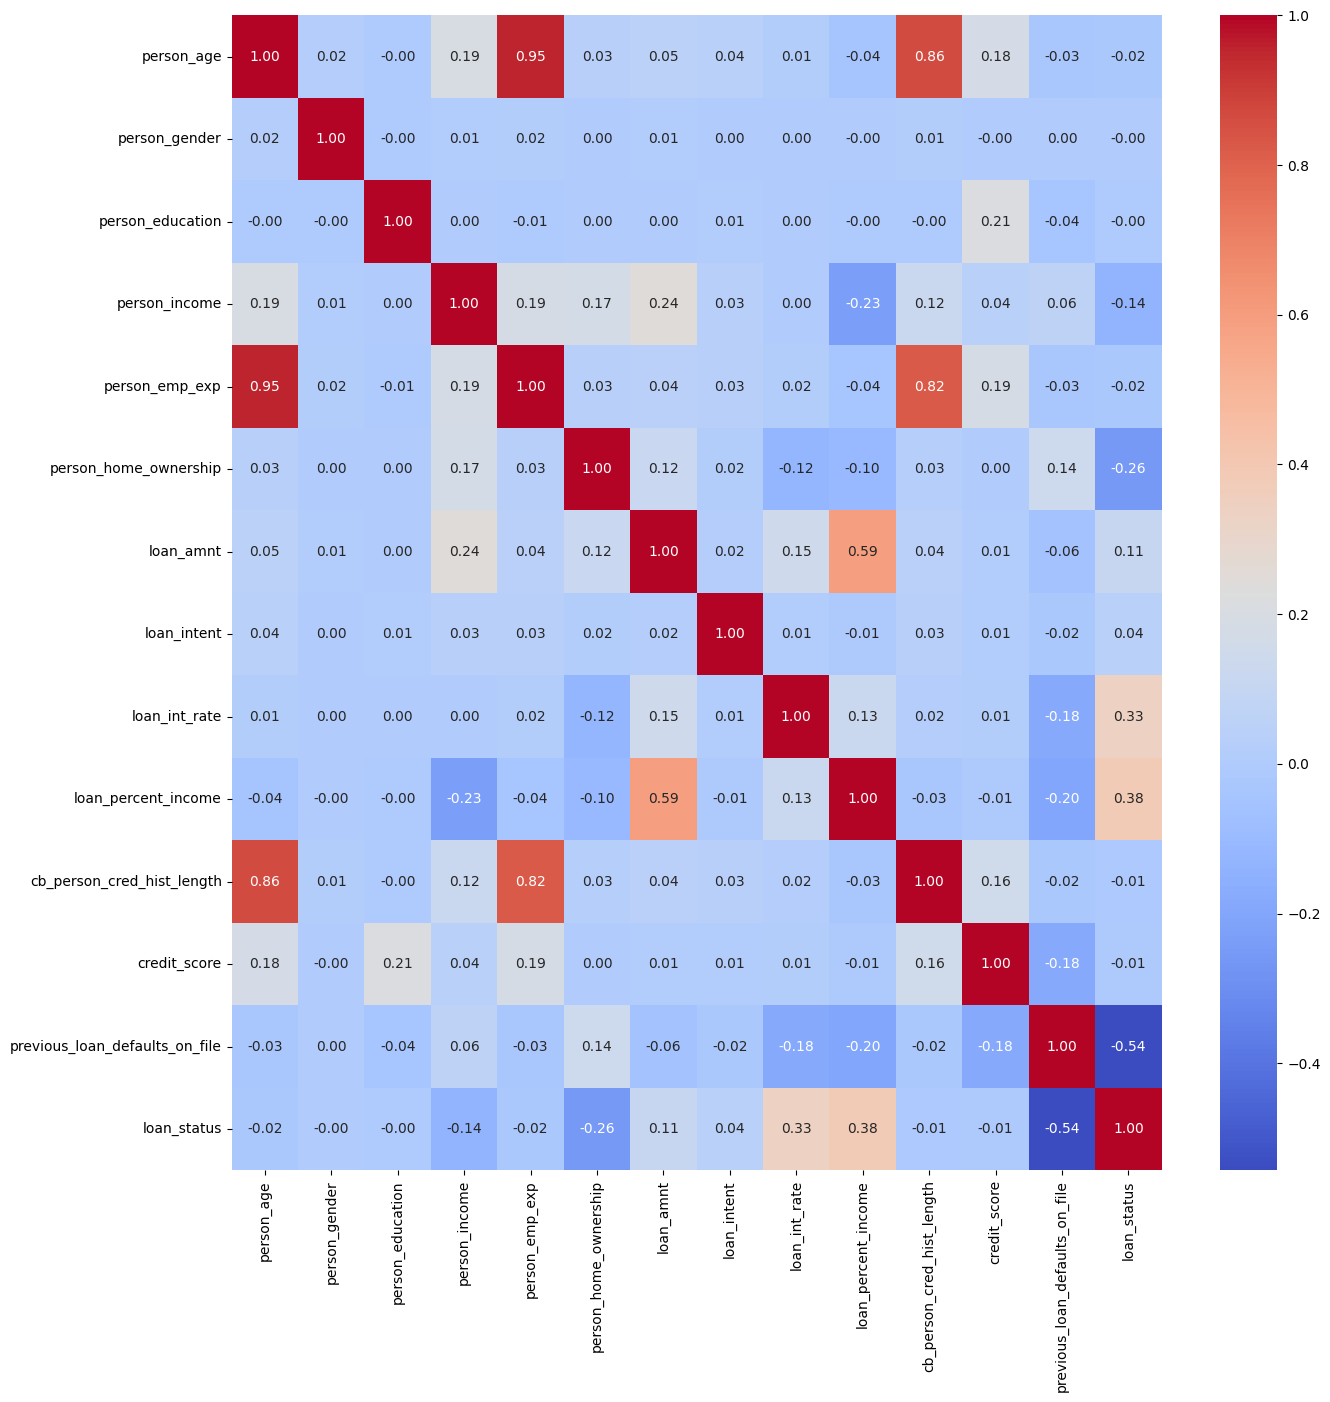

In [29]:
corr = encoded_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')


#Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report

logistic_model = LogisticRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(logistic_model, x_train_scaled, y_train, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


logistic_model.fit(x_train_scaled, y_train)
y_pred = logistic_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy scores for each fold: [0.88698413 0.89539683 0.89714286 0.89460317 0.89095238]
Mean Accuracy: 0.8930
Standard Deviation: 0.0036
Test Accuracy: 0.8903703703703704
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10493
           1       0.76      0.74      0.75      3007

    accuracy                           0.89     13500
   macro avg       0.84      0.84      0.84     13500
weighted avg       0.89      0.89      0.89     13500



In [31]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(logistic_model, x_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

logistic_model.fit(x_train_scaled, y_train)

y_pred = logistic_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.88492063 0.89190476 0.89349206 0.89746032 0.89920635]
Mean Accuracy: 0.8934
Standard Deviation: 0.0050
Test Accuracy: 0.8903703703703704
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10493
           1       0.76      0.74      0.75      3007

    accuracy                           0.89     13500
   macro avg       0.84      0.84      0.84     13500
weighted avg       0.89      0.89      0.89     13500



# KNN Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn_model, x_train_scaled, y_train, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

knn_model.fit(x_train_scaled, y_train)

y_pred = knn_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.88539683 0.89174603 0.89936508 0.89507937 0.89269841]
Mean Accuracy: 0.8929
Standard Deviation: 0.0046
Test Accuracy: 0.8898518518518519
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     10493
           1       0.78      0.70      0.74      3007

    accuracy                           0.89     13500
   macro avg       0.85      0.82      0.84     13500
weighted avg       0.89      0.89      0.89     13500



In [33]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn_model, x_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

knn_model.fit(x_train_scaled, y_train)

y_pred = knn_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.89190476 0.89269841 0.89       0.89539683 0.89079365]
Mean Accuracy: 0.8922
Standard Deviation: 0.0019
Test Accuracy: 0.8898518518518519
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     10493
           1       0.78      0.70      0.74      3007

    accuracy                           0.89     13500
   macro avg       0.85      0.82      0.84     13500
weighted avg       0.89      0.89      0.89     13500



#SVC

In [34]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf', random_state=42)
skf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc_model, x_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

svc_model.fit(x_train_scaled, y_train)

y_pred = svc_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.90634921 0.90714286 0.91238095 0.91142857 0.90952381]
Mean Accuracy: 0.9094
Standard Deviation: 0.0023
Test Accuracy: 0.9068888888888889
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10493
           1       0.83      0.73      0.78      3007

    accuracy                           0.91     13500
   macro avg       0.88      0.84      0.86     13500
weighted avg       0.90      0.91      0.90     13500



In [35]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc_model, x_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

svc_model.fit(x_train_scaled, y_train)

y_pred = svc_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.90460317 0.91365079 0.90714286 0.91015873 0.90904762]
Mean Accuracy: 0.9089
Standard Deviation: 0.0030
Test Accuracy: 0.9068888888888889
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10493
           1       0.83      0.73      0.78      3007

    accuracy                           0.91     13500
   macro avg       0.88      0.84      0.86     13500
weighted avg       0.90      0.91      0.90     13500

